In [33]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from basic_transformer.models.basic_transformer import BasicTransformer
from basic_transformer import utils as local_util

In [2]:
# model params
DIM = 16
NUM_WORDS = 5_000
MAX_SEQ_LEN = 128
LOAD_MODEL_TYPE = 'entire'  # options: 'state-dict', 'entire'

# Load Model

In [3]:
MODEL_SAVE_PATH = os.path.join("/media/can/MyData/models/", local_util.config.PROJECT_NAME)

In [4]:
# load tokenizer
tokenizer = pickle.load(open(os.path.join(MODEL_SAVE_PATH, 'train_tokenizer.pkl'), "rb"))
tokenizer

In [5]:
# load model
if LOAD_MODEL_TYPE == 'state-dict':
    model = BasicTransformer(dim=DIM, num_embeddings=NUM_WORDS, embedding_dim=DIM)
    model_path = os.path.join("/media/can/MyData/models", local_util.config.PROJECT_NAME, "model.pth")
    model_state_dict = torch.load(model_path)
    model.load_state_dict(model_state_dict)
elif LOAD_MODEL_TYPE == 'entire':
    f = os.path.join("/media/can/MyData/models", local_util.config.PROJECT_NAME, "model_entire.pth")
    model = torch.load(f)
else:
    raise ValueError("Unknown `LOAD_MODEL_TYPE`: {}".format(LOAD_MODEL_TYPE))

In [6]:
model.W_q.device

device(type='cuda', index=0)

In [7]:
# model.cuda()

In [8]:
model.eval()

BasicTransformer(
  (embed_layer): Embedding(5001, 16)
  (linear): Linear(in_features=16, out_features=16, bias=True)
  (linear_clf): Linear(in_features=16, out_features=1, bias=True)
)

# Do Test

In [37]:
text = "we've used cccu for years. we've always felt like valued members and we've always received great customer service. we've never had any issues or disappointments. very happy!"
text_seq = tokenizer.texts_to_sequences([text])[0]
text_seq = [local_util.data.fix_seq_len(text_seq, max_len=MAX_SEQ_LEN)]
p = model(torch.tensor(text_seq).cuda())
p

/home/can/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[0.9728]], device='cuda:0', grad_fn=<SigmoidBackward>)

# Activations

In [38]:
d = model.weights_per_timestep
d_array = np.concatenate([d[i].numpy() for i in range(len(d))], axis=0)
d_array.shape

(128, 128)

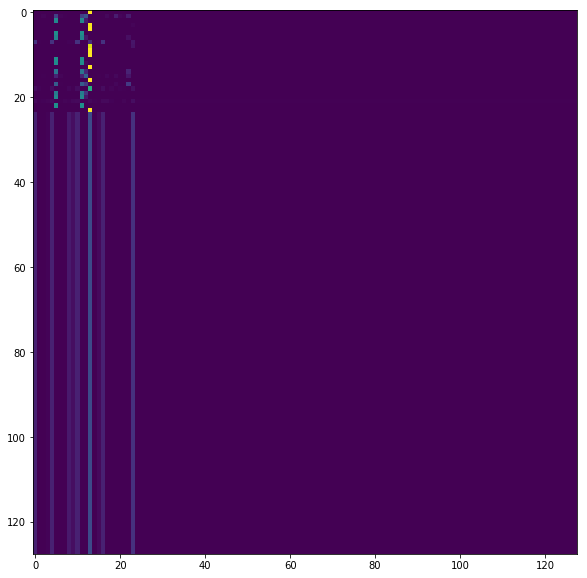

In [39]:
# Plot
fig = plt.figure(figsize=(10, 10))
plt.imshow(d_array[: len(text), : len(text)])